In [ ]:
# Emilie Helen Wolf
# December 14, 2021
# This project explores ensemble techniques such as bagging and boosting on classification models

# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [1]:
# import warnings
# warnings.filterwarnings("ignore")

# Automatically structures Python code
%load_ext nb_black

# libraries for manipulating arrays and dataframes
import numpy as np
import pandas as pd

np.random.seed(55)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

# libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
sns.set_context("talk")

# libraries for bagging and boosting
from sklearn.ensemble import (
    GradientBoostingClassifier,
    AdaBoostClassifier,
    RandomForestClassifier,
    BaggingClassifier,
    StackingClassifier,
)
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

# libraries for preparing and scoring models
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    precision_recall_curve,
    make_scorer,
)

# import the dataset and make a copy
easyvisa = pd.read_csv("EasyVisa.csv")
df = easyvisa.copy()
df.head()

case_id continent education_of_employee has_job_experience  \
0  EZYV01      Asia           High School                  N   
1  EZYV02      Asia              Master's                  Y   
2  EZYV03      Asia            Bachelor's                  N   
3  EZYV04      Asia            Bachelor's                  N   
4  EZYV05    Africa              Master's                  Y   

  requires_job_training  no_of_employees  yr_of_estab region_of_employment  \
0                     N            14513         2007                 West   
1                     N             2412         2002            Northeast   
2                     Y            44444         2008                 West   
3                     N               98         1897                 West   
4                     N             1082         2005                South   

   prevailing_wage unit_of_wage full_time_position case_status  
0         592.2029         Hour                  Y      Denied  
1       83425.6500         Year                  Y   Certified  
2      122996.8600         Year                  Y      Denied  
3       83434.0300         Year                  Y      Denied  
4      149907.3900         Year                  Y   Certified

<IPython.core.display.Javascript object>

## Data Overview

- Observations
- Sanity checks

In [2]:
# check for missing values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


<IPython.core.display.Javascript object>

In [3]:
# Look at a random sample of 20 rows
df.sample(n=20)

case_id      continent education_of_employee has_job_experience  \
17344  EZYV17345           Asia              Master's                  Y   
2194    EZYV2195           Asia              Master's                  Y   
4443    EZYV4444  North America              Master's                  N   
498      EZYV499           Asia            Bachelor's                  N   
22658  EZYV22659         Europe            Bachelor's                  Y   
5229    EZYV5230           Asia              Master's                  N   
19527  EZYV19528  North America           High School                  Y   
6655    EZYV6656         Europe              Master's                  Y   
8284    EZYV8285         Europe             Doctorate                  N   
18096  EZYV18097           Asia              Master's                  Y   
13773  EZYV13774           Asia            Bachelor's                  Y   
18591  EZYV18592           Asia              Master's                  N   
10828  EZYV10829         Europe              Master's                  Y   
9874    EZYV9875           Asia            Bachelor's                  N   
1622    EZYV1623  South America              Master's                  N   
10813  EZYV10814           Asia            Bachelor's                  N   
24172  EZYV24173           Asia              Master's                  Y   
4309    EZYV4310           Asia            Bachelor's                  N   
19963  EZYV19964           Asia            Bachelor's                  Y   
13835  EZYV13836           Asia              Master's                  Y   

      requires_job_training  no_of_employees  yr_of_estab  \
17344                     N             4949         1966   
2194                      N           145007         2012   
4443                      Y              942         1988   
498                       N             1110         1963   
22658                     N             5199         1919   
5229                      Y             4473         1983   
19527                     N            13339         2005   
6655                      N             3911         1995   
8284                      N              104         1872   
18096                     N              472         1993   
13773                     N             1639         2007   
18591                     N             2114         1925   
10828                     N             2936         1998   
9874                      N              826         1994   
1622                      N             1839         1964   
10813                     N             3275         2006   
24172                     N             1123         2005   
4309                      N             2588         1801   
19963                     N               45         2007   
13835                     N              390         1992   

      region_of_employment  prevailing_wage unit_of_wage full_time_position  \
17344                 West         65710.83         Year                  Y   
2194                  West         93415.62         Year                  Y   
4443                 South         51763.05         Year                  Y   
498                  South         97931.99        Month                  Y   
22658            Northeast         36031.22         Year                  Y   
5229             Northeast        163519.84         Year                  Y   
19527                 West         37203.11         Year                  Y   
6655                  West         31843.03         Year                  Y   
8284             Northeast         51214.55         Year                  Y   
18096            Northeast         59219.91         Year                  Y   
13773                 West         79873.42         Year                  Y   
18591            Northeast        150340.36         Year                  Y   
10828            Northeast         46086.74         Year                  Y   
9874             Northea

<IPython.core.display.Javascript object>

In [4]:
# Look at all the objects and their unique values and check for missing values

objcols = df.dtypes[df.dtypes == "object"].index.tolist()
num_to_display = 10

for colname in objcols:
    val_counts = (
        df[colname].value_counts(normalize=True).mul(100).round(2).astype(str) + "%"
    )
    print(val_counts[:num_to_display])
    if len(val_counts) > num_to_display:
        print(f"Only displaying first {num_to_display} of {len(val_counts)} values.")
    print("\n")

EZYV24066    0.0%
EZYV22639    0.0%
EZYV9937     0.0%
EZYV21922    0.0%
EZYV1275     0.0%
EZYV14258    0.0%
EZYV14479    0.0%
EZYV18128    0.0%
EZYV11581    0.0%
EZYV611      0.0%
Name: case_id, dtype: object
Only displaying first 10 of 25480 values.


Asia             66.17%
Europe           14.65%
North America    12.92%
South America     3.34%
Africa            2.16%
Oceania           0.75%
Name: continent, dtype: object


Bachelor's     40.16%
Master's       37.81%
High School    13.42%
Doctorate        8.6%
Name: education_of_employee, dtype: object


Y    58.09%
N    41.91%
Name: has_job_experience, dtype: object


N    88.4%
Y    11.6%
Name: requires_job_training, dtype: object


Northeast    28.24%
South        27.54%
West         25.85%
Midwest       16.9%
Island        1.47%
Name: region_of_employment, dtype: object


Year     90.12%
Hour      8.47%
Week      1.07%
Month     0.35%
Name: unit_of_wage, dtype: object


Y    89.38%
N    10.62%
Name: full_time_position, dtype: obj

<IPython.core.display.Javascript object>

In [5]:
# There are 25480 unique values of case_id, so we will drop it and check for row duplicates
df = df.drop("case_id", axis=1)
df.duplicated().sum()

0

<IPython.core.display.Javascript object>

In [6]:
# Statistical summary of the categorical data
df.describe(include="object").T

count unique         top   freq
continent              25480      6        Asia  16861
education_of_employee  25480      4  Bachelor's  10234
has_job_experience     25480      2           Y  14802
requires_job_training  25480      2           N  22525
region_of_employment   25480      5   Northeast   7195
unit_of_wage           25480      4        Year  22962
full_time_position     25480      2           Y  22773
case_status            25480      2   Certified  17018

<IPython.core.display.Javascript object>

In [7]:
# Statistical summary of the numerical data
df.describe().T

count          mean           std        min       25%  \
no_of_employees  25480.0   5667.043210  22877.928848   -26.0000   1022.00   
yr_of_estab      25480.0   1979.409929     42.366929  1800.0000   1976.00   
prevailing_wage  25480.0  74455.814592  52815.942327     2.1367  34015.48   

                      50%          75%        max  
no_of_employees   2109.00    3504.0000  602069.00  
yr_of_estab       1997.00    2005.0000    2016.00  
prevailing_wage  70308.21  107735.5125  319210.27

<IPython.core.display.Javascript object>

# First Look 

- #### The original dataset has 25,480 rows of observations
    - No duplicates found
    
- #### The original dataset has 12 columns
    - We removed `case_id` as it does not add any value to predicting case status
    
- #### The dataset appears tidy but needs manipulations
    - No missing values found
    - `no_of_employees` has negative numbers and is heavily right-skewed with outliers
    - `yr_of_estab` is left-skewed with 1800 as the earliest year
        - years seem factual and not outliers
    - `prevailing_wage` and `unit_of_wage` may need to be engineered 

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

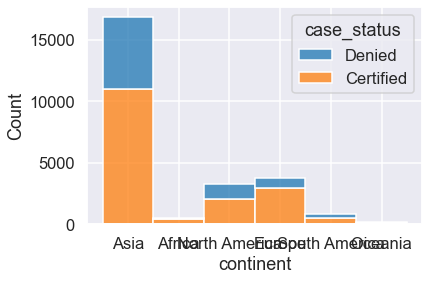

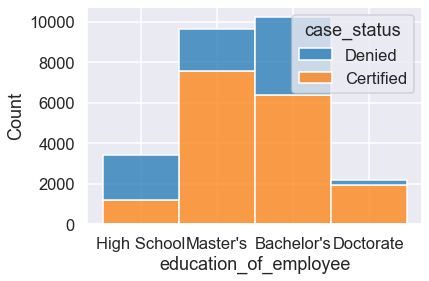

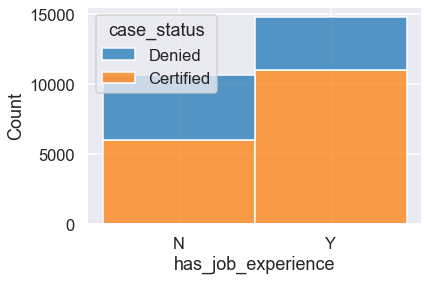

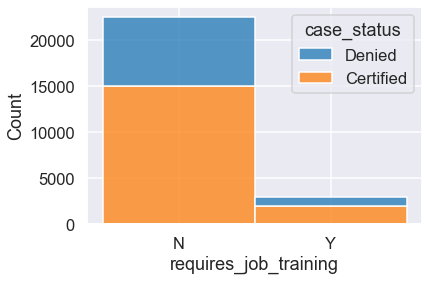

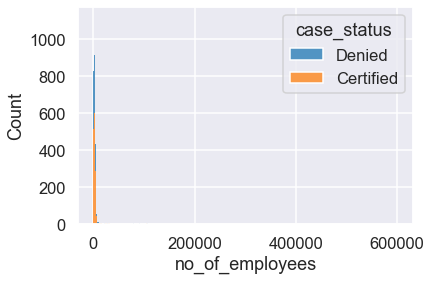

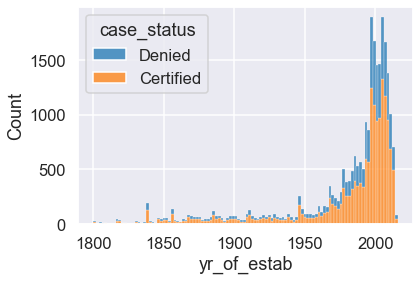

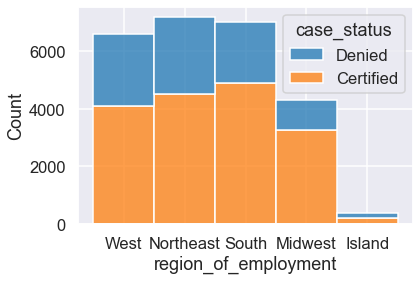

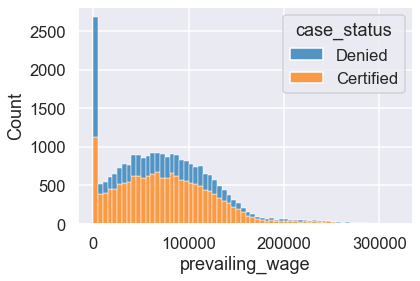

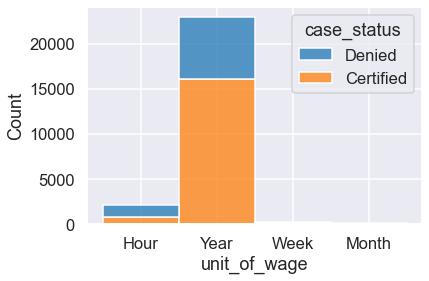

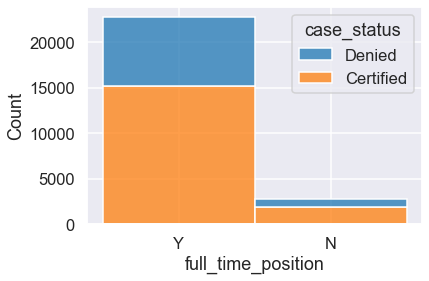

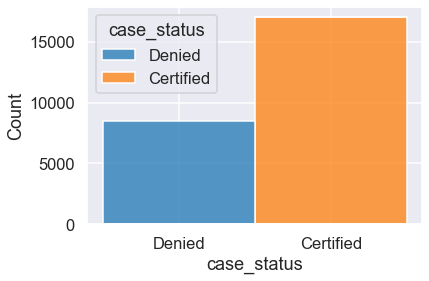

<IPython.core.display.Javascript object>

In [8]:
# Look at histogram of each feature
for i in df.columns:
    sns.histplot(data=df, x=i, hue="case_status", multiple="stack")
    plt.show()

In [9]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

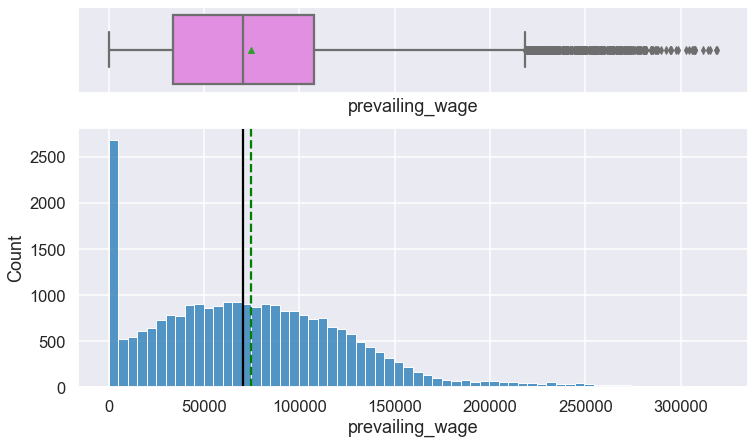

<IPython.core.display.Javascript object>

In [10]:
# Histogram and boxplot of Prevailing Wage

histogram_boxplot(df, "prevailing_wage")

In [11]:
# Which values are negative?
df.loc[df["no_of_employees"] < 0]["no_of_employees"].describe()

count    33.000000
mean    -17.757576
std       6.285053
min     -26.000000
25%     -25.000000
50%     -14.000000
75%     -11.000000
max     -11.000000
Name: no_of_employees, dtype: float64

<IPython.core.display.Javascript object>

### There are 33 values that are negative. They range from -26 to -11. We will take the absolute value of the column.

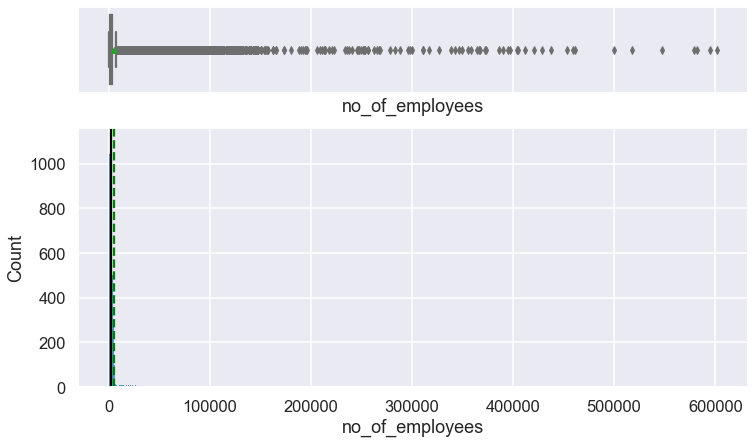

<IPython.core.display.Javascript object>

In [12]:
# Change negative values to positive in the no_of_employees column
df["no_of_employees"] = abs(df["no_of_employees"])

# Company size
histogram_boxplot(df, "no_of_employees")

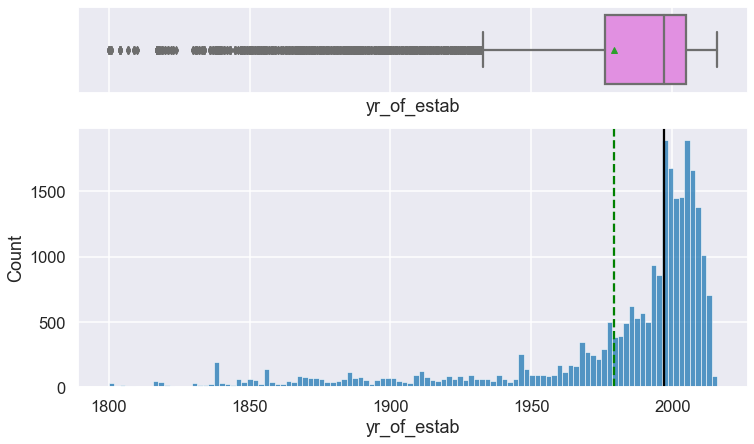

<IPython.core.display.Javascript object>

In [13]:
# Year of Establishment

histogram_boxplot(df, "yr_of_estab")

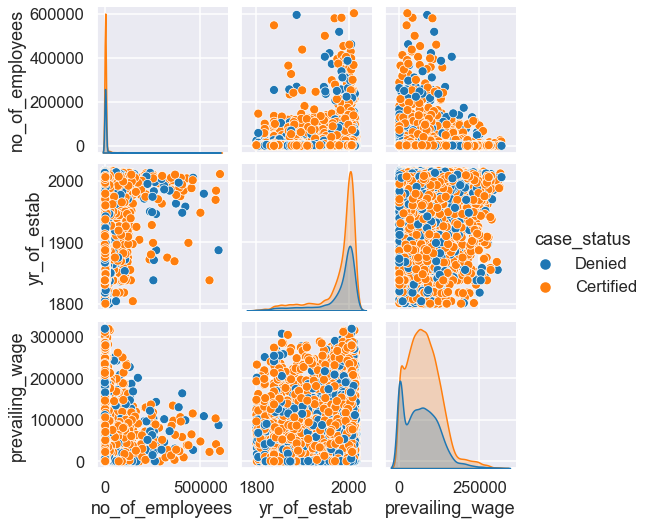

<IPython.core.display.Javascript object>

In [14]:
# Pairplot of numerical data

sns.pairplot(data=df, hue="case_status")

<AxesSubplot:>

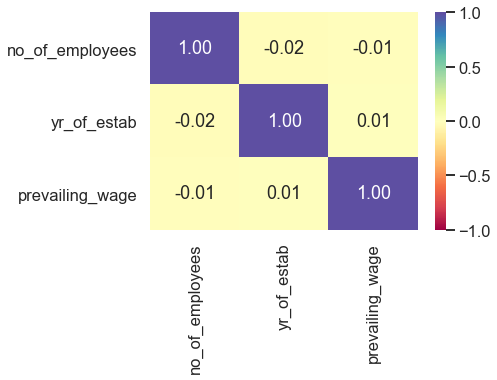

<IPython.core.display.Javascript object>

In [15]:
# Heatmap of correlations

sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")

# Initial EDA Observations:

- Negative numbers in `no_of_employees` were made positive
- Most employees are coming from Asia
- Most employees have a Bachelor's or Master's
- Most employees have job experience and very few employees require training
- Half of companies have between 1000 and 3500 employees


- The distribution of `prevailing_wage` shows 2 peaks, suggesting one for hourly wages and one for salary
- There are about twice as many 'certified' as there are 'denied' cases, so the target variable may need balancing later
- Most positions are full-time
- The majority of companies were established in the last 40-50 years
- The intended region of employment seems evenly distributed when considering geography (fewer populations in Midwest and Island)


- No strong correlations in the numerical data
- `prevailing_wage`, `yr_of_estab`, and `no_of_employees` all have statistical outliers


### We will keep the outliers and we will use Decision Trees in our modeling since Decision Trees are not sensitive to outliers


# Let's Visualize the Data Further

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification? 

2. How does the visa status vary across different continents? 
 
3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 
 
4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? 
 
5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


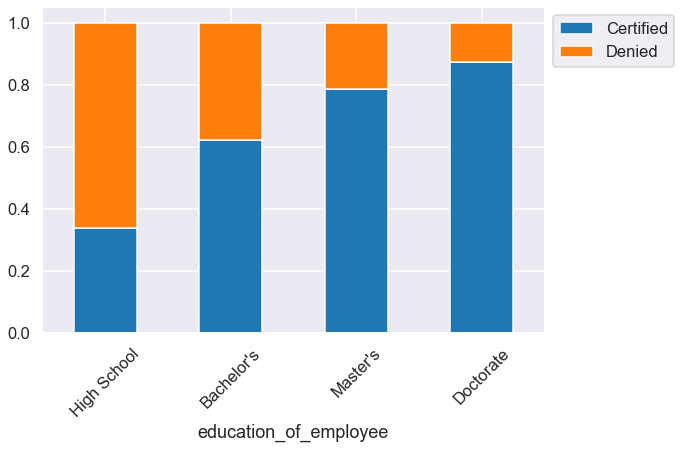

<IPython.core.display.Javascript object>

In [16]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.xticks(rotation=45)

    plt.show()


# Compare education and visa status
stacked_barplot(df, "education_of_employee", "case_status")

#### 1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification? 

# Observation:

Yes! The higher the education, the higher percentage of Visa certifications.
- 30% of High School graduates get certified
- 60% of Bachelor's graduates get certified
- 80% of Master's graduates get certified
- Almost 90% of all Doctorates get certified

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


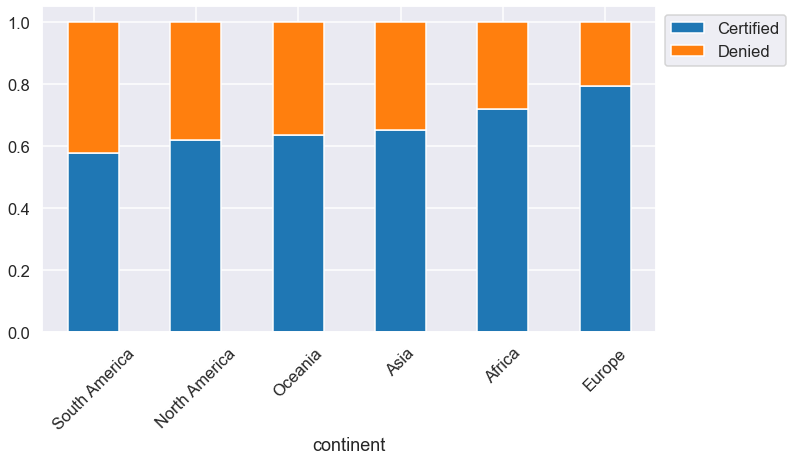

<IPython.core.display.Javascript object>

In [17]:
# Compare continent and visa status
stacked_barplot(df, "continent", "case_status")

#### 2. How does the visa status vary across different continents? 
# Observation:

- Certification rates are high for all continents, which is good
- Europe has the most certifications at around 80%
- Africa has the second-highest percentage at around 70%
- South America has the lowest certifcation rate at just under 60%

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


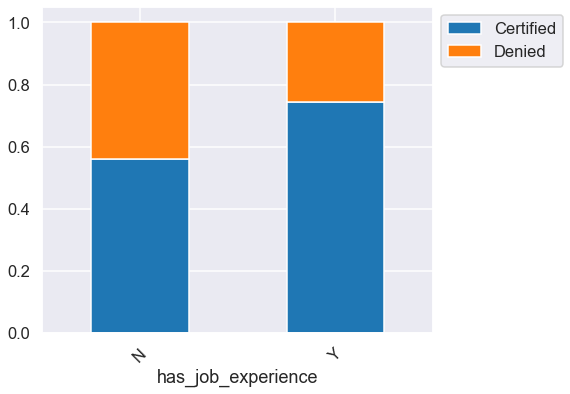

<IPython.core.display.Javascript object>

In [18]:
# Compare job experience to visa status

stacked_barplot(df, "has_job_experience", "case_status")

#### 3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?

# Observation:

- Yes! Those who have job experience experience a higher rate of visa approval compared to those without job experience.

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


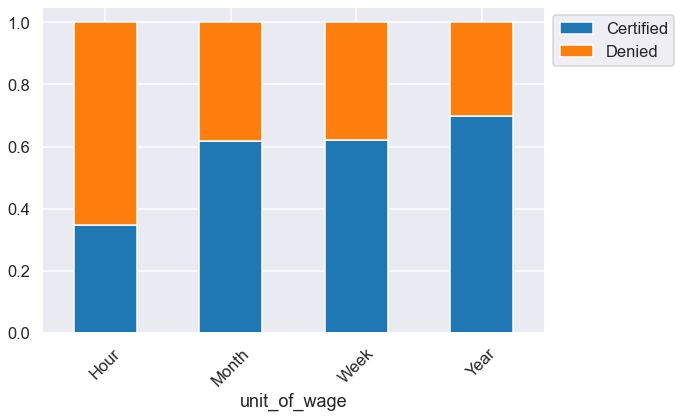

<IPython.core.display.Javascript object>

In [19]:
# Compare unit of wage to visa status

stacked_barplot(df, "unit_of_wage", "case_status")

#### 4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? 

# Observation:

- Applications with yearly pay are the most likely to be approved for visa certification at around 70%
- Of those in the hourly pay category, only 35% were approved in this dataset.
- Month and Week had a 60% approval rate

<AxesSubplot:xlabel='prevailing_wage', ylabel='case_status'>

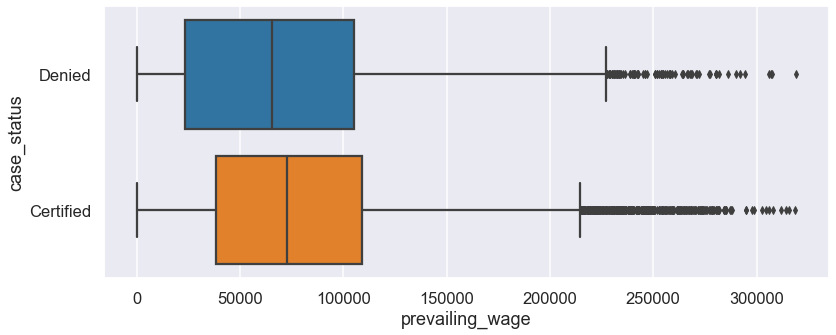

<IPython.core.display.Javascript object>

In [20]:
# Compare prevailing wage to visa status

plt.figure(figsize=(13, 5))
sns.boxplot(
    data=df, x="prevailing_wage", y="case_status",
)

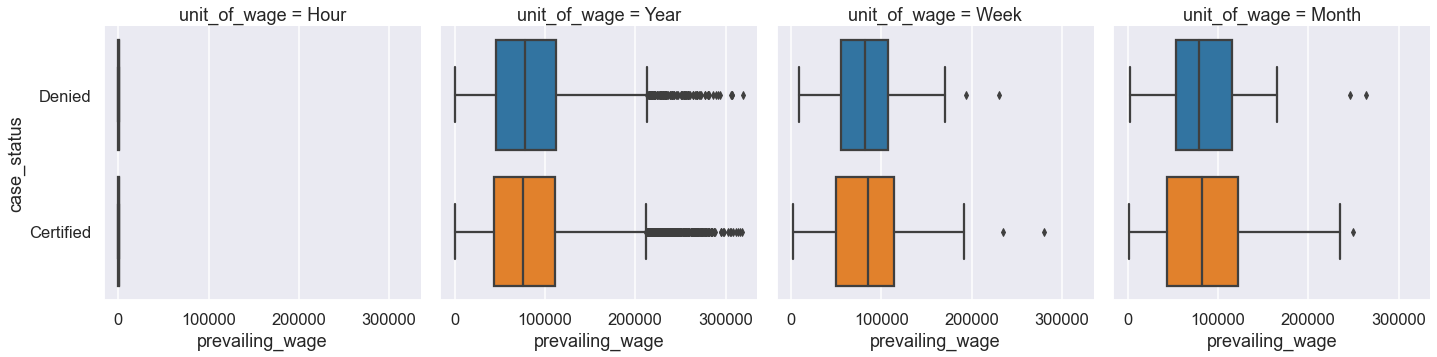

<IPython.core.display.Javascript object>

In [21]:
# Compare prevailing wage to visa status

sns.catplot(
    data=df, kind="box", x="prevailing_wage", col="unit_of_wage", y="case_status",
)

#### 5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

# Observation:
- It's hard to say, but certified visas generally have a higher prevailing wage
- When the prevailing wage is broken down by unit, it's even more difficult to say there is a correlation
- Let's look closer at hourly...

Text(0.5, 1.0, 'Prevailing Wage for Hourly Unit')

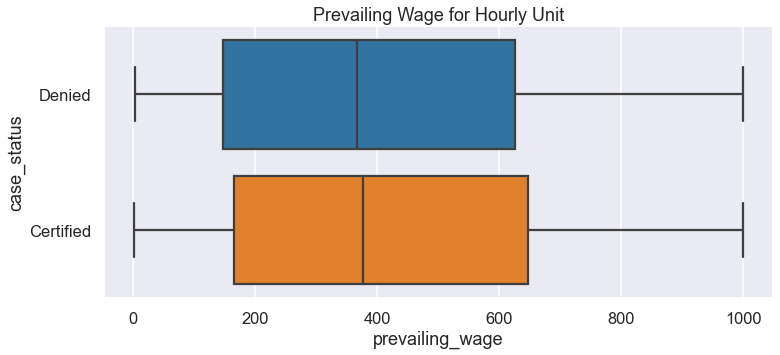

<IPython.core.display.Javascript object>

In [22]:
# Compare prevailing wage to visa status for just Hour

plt.figure(figsize=(12, 5))
sns.boxplot(
    data=df.loc[df["unit_of_wage"] == "Hour"], x="prevailing_wage", y="case_status",
)
plt.title("Prevailing Wage for Hourly Unit")

case_status            Certified  Denied    All
requires_job_training                          
All                        17018    8462  25480
N                          15012    7513  22525
Y                           2006     949   2955
------------------------------------------------------------------------------------------------------------------------


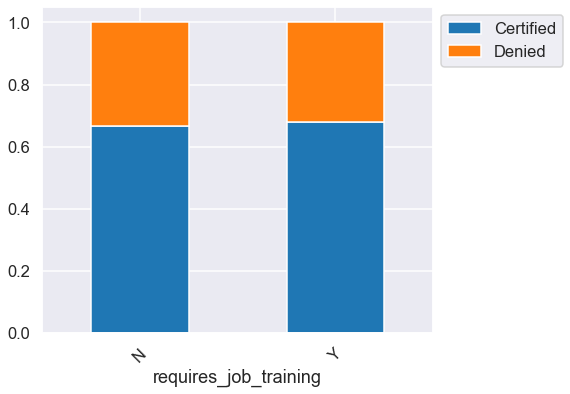

<IPython.core.display.Javascript object>

In [23]:
# Compare requires job training to visa status

stacked_barplot(df, "requires_job_training", "case_status")

# Observation
The rate of certification does not seem to be influenced by whether or not an employee requires job training

case_status         Certified  Denied    All
full_time_position                          
All                     17018    8462  25480
Y                       15163    7610  22773
N                        1855     852   2707
------------------------------------------------------------------------------------------------------------------------


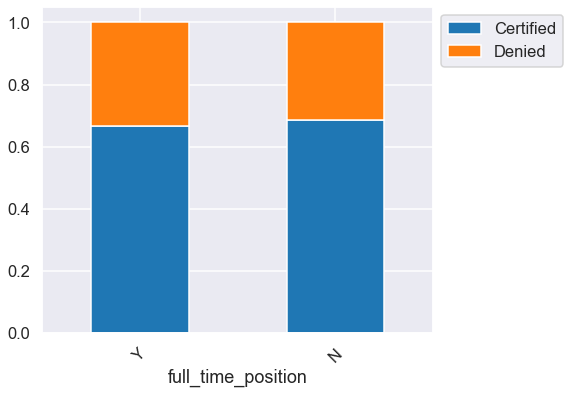

<IPython.core.display.Javascript object>

In [24]:
# Compare full_time_position to visa status
stacked_barplot(df, "full_time_position", "case_status")

# Observation
The rate of certification is also the same whether or not the position is full time

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


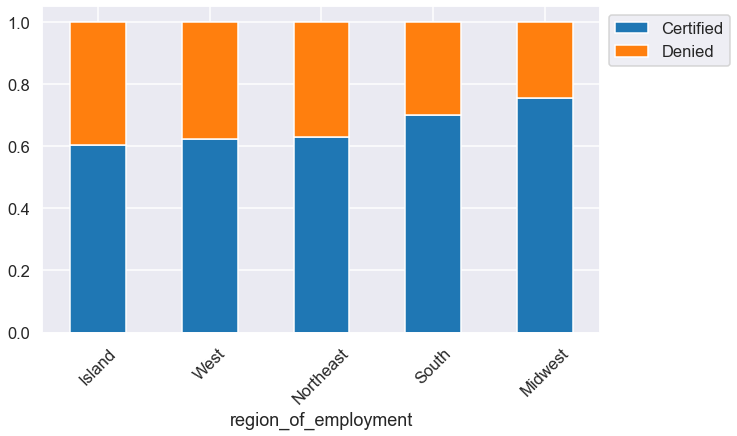

<IPython.core.display.Javascript object>

In [25]:
# Compare region_of_employment to visa status
stacked_barplot(df, "region_of_employment", "case_status")

# Observation
There seems to be a higher rate of certification for employees going to the Midwest region

<AxesSubplot:xlabel='yr_of_estab', ylabel='no_of_employees'>

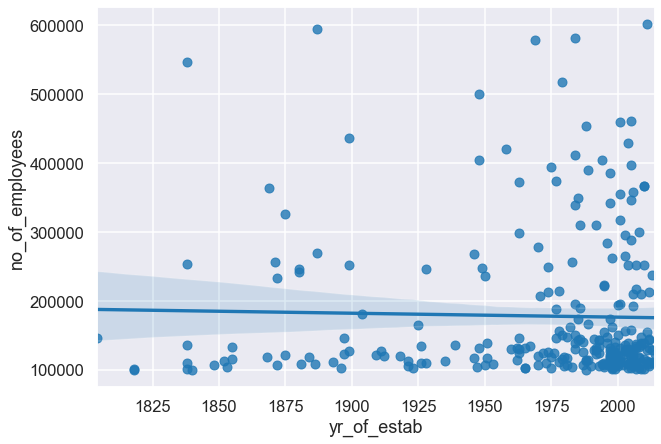

<IPython.core.display.Javascript object>

In [26]:
# Are big companies generally older?
plt.figure(figsize=(10, 7))
sns.regplot(
    data=df.loc[df["no_of_employees"] > 100000], y="no_of_employees", x="yr_of_estab"
)

# Observation
- Companies with over 100,000 employees vary evenly in age. There is no correlation.

<AxesSubplot:xlabel='region_of_employment', ylabel='prevailing_wage'>

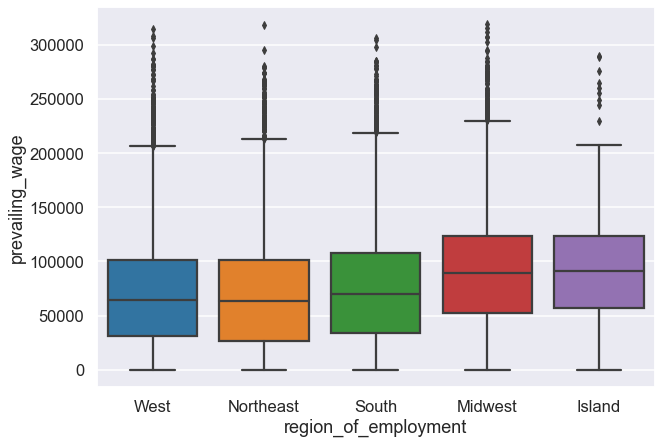

<IPython.core.display.Javascript object>

In [27]:
plt.figure(figsize=(10, 7))
sns.boxplot(data=df, x="region_of_employment", y="prevailing_wage")

# Observation
The prevailing wage average is a little higher in the Midwest and Island regions.

<AxesSubplot:xlabel='unit_of_wage', ylabel='prevailing_wage'>

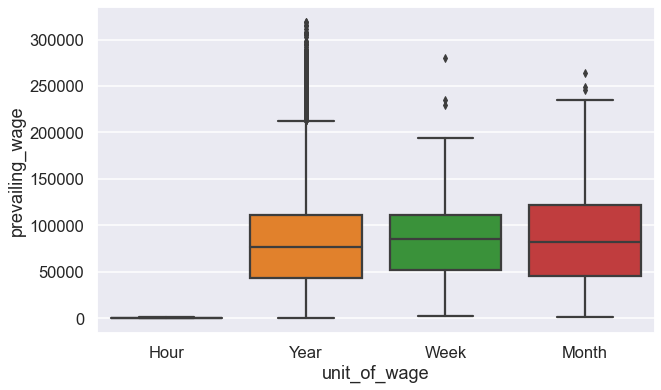

<IPython.core.display.Javascript object>

In [28]:
# Boxplot of prevailing wage grouped by wage of unit

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="unit_of_wage", y="prevailing_wage")

# Observation
The average prevailing wage for Year, Week, and Month are nearly the same. Only hourly wages look different.

unit_of_wage         Hour          Month           Week           Year
count         2157.000000      89.000000     272.000000   22962.000000
mean           414.570513   87592.864045   85606.820515   81228.077133
std            275.015000   59525.124924   44802.704810   49951.473223
min              2.136700    1599.280000    2183.230000     100.000000
25%            152.700300   44986.240000   51408.277500   43715.955000
50%            372.652300   81826.010000   85075.820000   76174.500000
75%            637.311100  121629.600000  111331.910000  111341.960000
max            999.919500  264362.950000  280175.950000  319210.270000


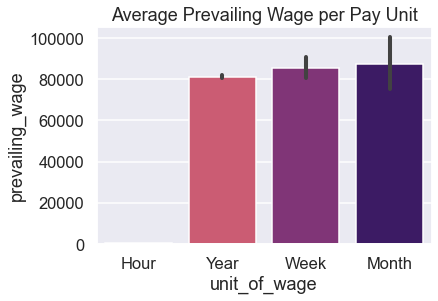

<IPython.core.display.Javascript object>

In [29]:
# What is the average prevailing wage per each wage unit?

sns.barplot(
    data=df, x="unit_of_wage", y="prevailing_wage", palette="magma_r",
)
plt.title("Average Prevailing Wage per Pay Unit")

print(df.groupby(["unit_of_wage"])["prevailing_wage"].describe().T)

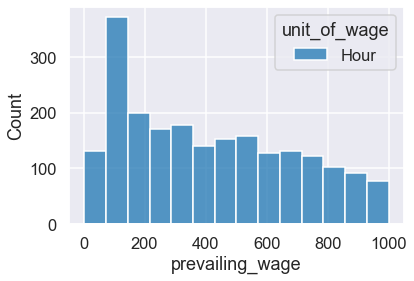

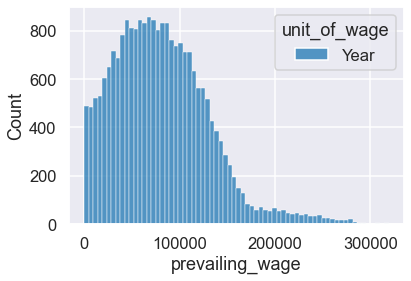

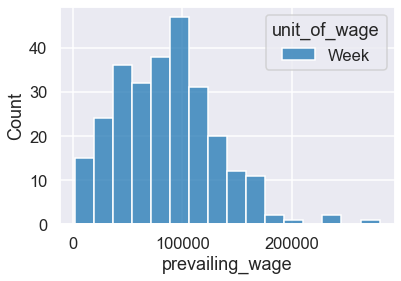

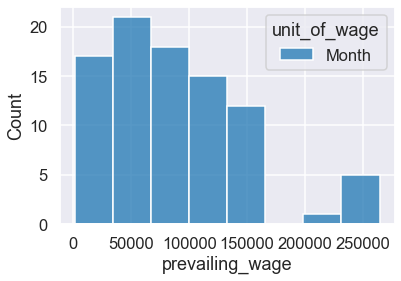

<IPython.core.display.Javascript object>

In [30]:
# Histogram of each prevailing wage by unit

for i in df["unit_of_wage"].unique().tolist():
    sns.histplot(
        data=df.loc[df["unit_of_wage"] == i],
        x="prevailing_wage",
        hue="unit_of_wage",
        multiple="stack",
    )
    plt.show()

# Observation:
The prevailing wage for Hour ranges from 0 to 1000. The other units have far greater ranges.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering 
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [31]:
# Make a copy and call it fe for feature-engineered dataframe
fe = df.copy()

# Change all Y/N to 1/0
for i in ["has_job_experience", "requires_job_training", "full_time_position"]:
    fe[i] = fe[i].map({"Y": 1, "N": 0})

# Change case status to 1 for certified and 0 for denied
fe["case_status"] = fe["case_status"].map({"Certified": 1, "Denied": 0})

# Change education to ordinal numbers
fe["education_of_employee"] = fe["education_of_employee"].map(
    {"High School": 0, "Bachelor's": 1, "Master's": 2, "Doctorate": 3,}
)

# One-hot encode the remaining object columns and drop the first column of each
fe = pd.get_dummies(
    fe, columns=["continent", "region_of_employment", "unit_of_wage"], drop_first=True,
)

<IPython.core.display.Javascript object>

# Summary of Data Processing

In this 1st level of processing, we one-hot encoded the object columns as well as changed the `education_of_employee` to ordinal numbers.

- There were no missing values.
- The negative numbers in `no_of_employees` were changed to positive numbers.
- Outliers were found but they will be left alone
    - We will use Decision Trees during modeling since Decision Trees can handle outliers well
- Natural Log will be applied to 2 of the columns in the next step to scale the data

## EDA

- It is a good idea to explore the data once again after manipulating it.

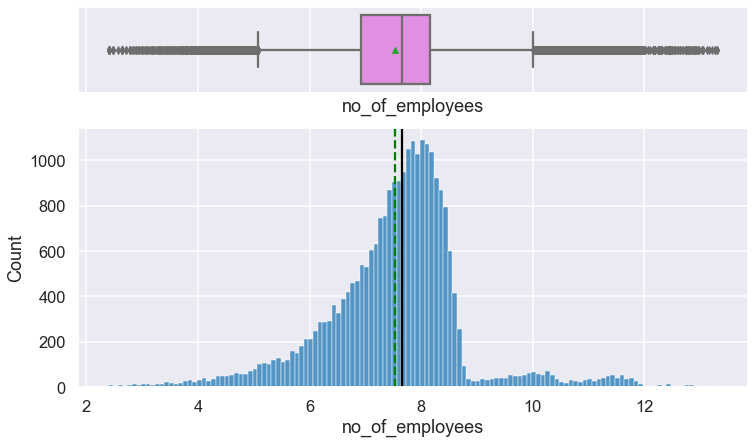

<IPython.core.display.Javascript object>

In [32]:
# Make a copy of the data frame and call it nl for natural-log-transformed
nl = fe.copy()

# Natural Log transformation on no_of_employees
nl["no_of_employees"] = np.log(nl["no_of_employees"])
histogram_boxplot(nl, "no_of_employees")

<AxesSubplot:xlabel='no_of_employees', ylabel='Count'>

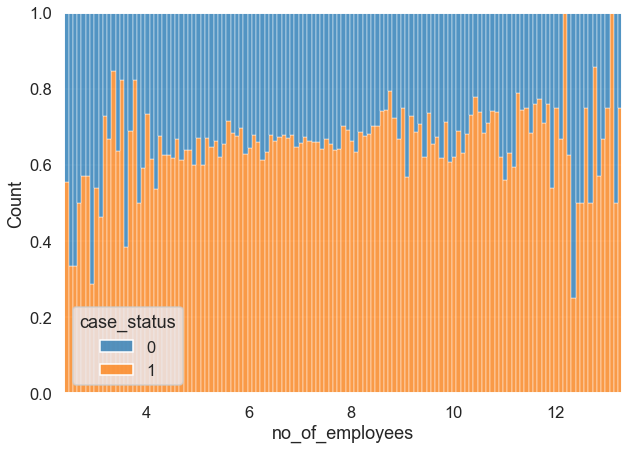

<IPython.core.display.Javascript object>

In [33]:
plt.figure(figsize=(10, 7))
sns.histplot(data=nl, x="no_of_employees", hue="case_status", multiple="fill")

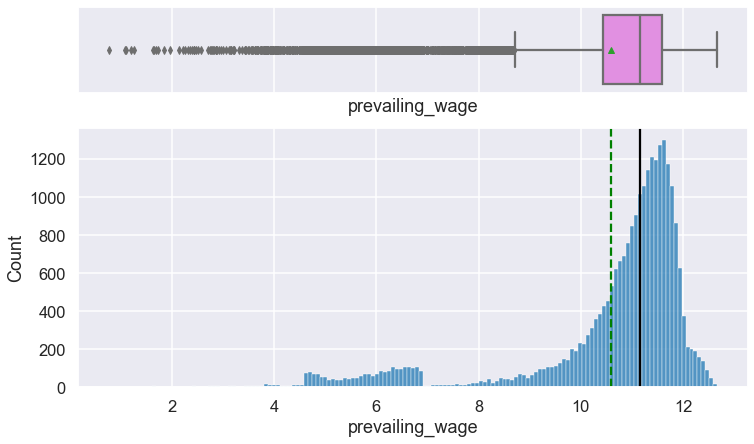

<IPython.core.display.Javascript object>

In [34]:
# Natural Log transformation on prevailing_wage
nl["prevailing_wage"] = np.log(nl["prevailing_wage"])
histogram_boxplot(nl, "prevailing_wage")

<AxesSubplot:xlabel='prevailing_wage', ylabel='Count'>

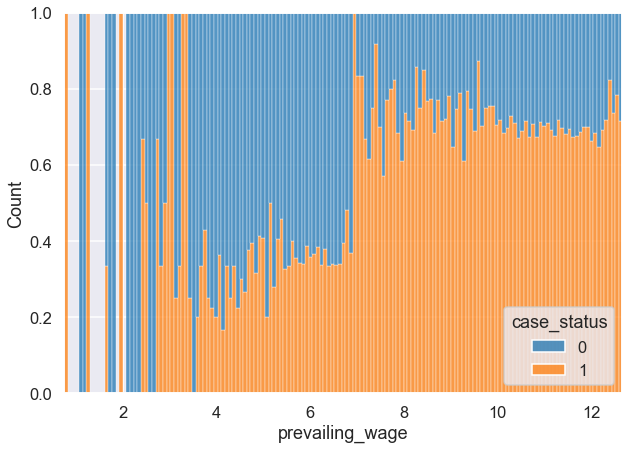

<IPython.core.display.Javascript object>

In [35]:
plt.figure(figsize=(10, 7))
sns.histplot(data=nl, x="prevailing_wage", hue="case_status", multiple="fill")

<AxesSubplot:xlabel='yr_of_estab', ylabel='no_of_employees'>

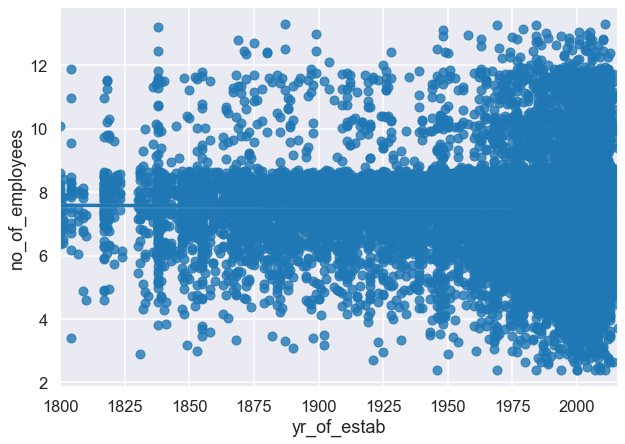

<IPython.core.display.Javascript object>

In [36]:
plt.figure(figsize=(10, 7))
sns.regplot(data=nl, y="no_of_employees", x="yr_of_estab")

<AxesSubplot:>

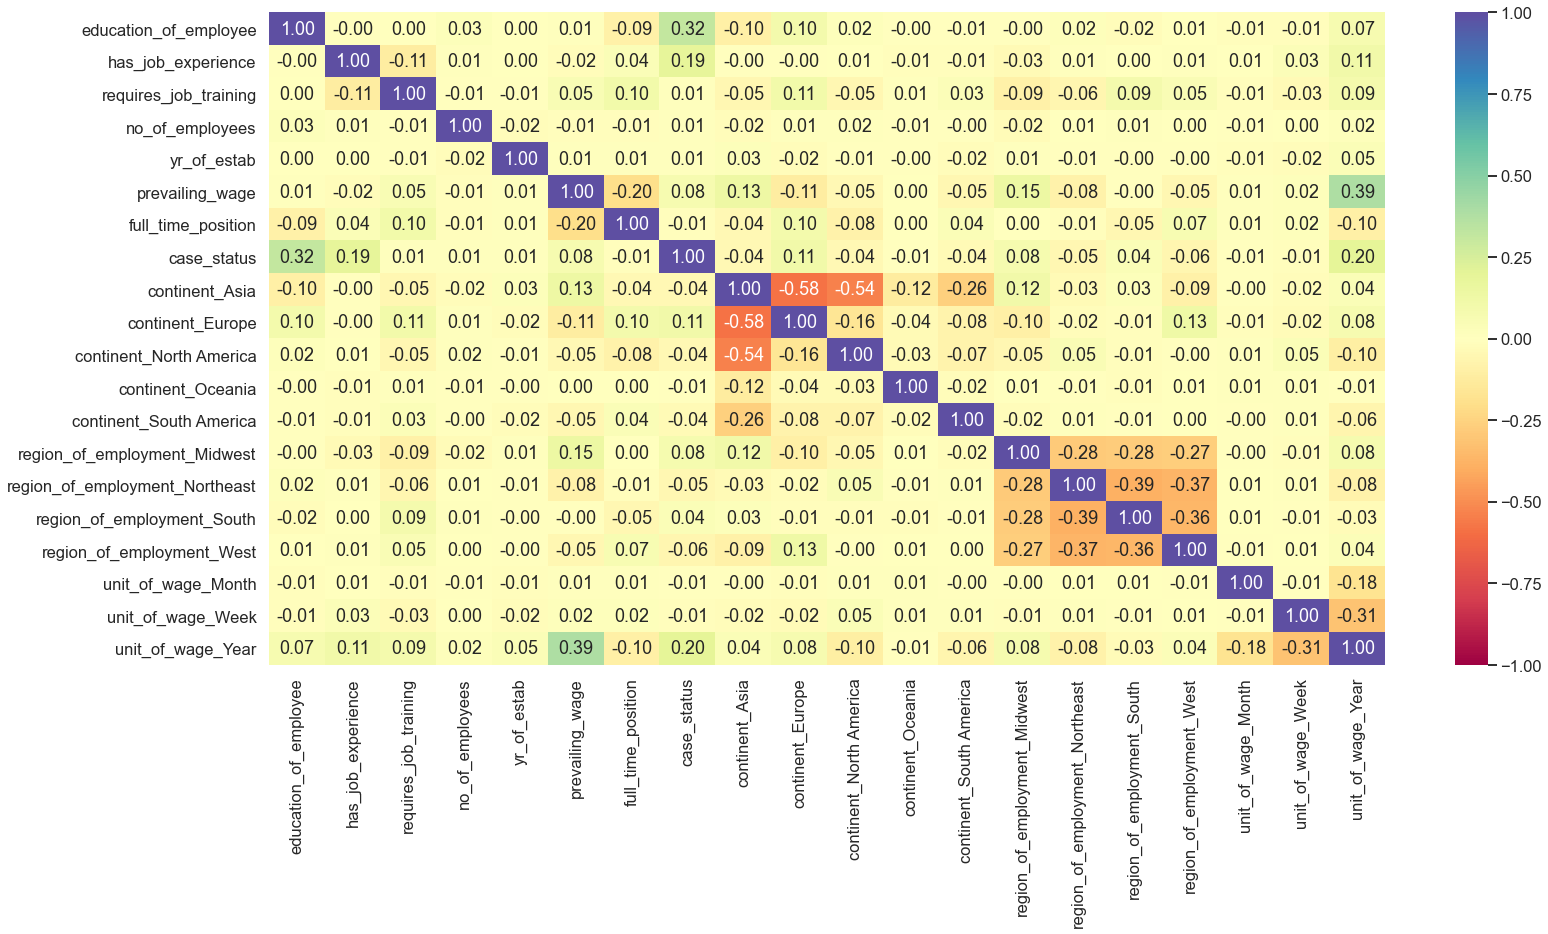

<IPython.core.display.Javascript object>

In [37]:
# Plot correlation heatmap (BEFORE applying log transformations)

plt.figure(figsize=(25, 12))
sns.heatmap(fe.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")

<AxesSubplot:>

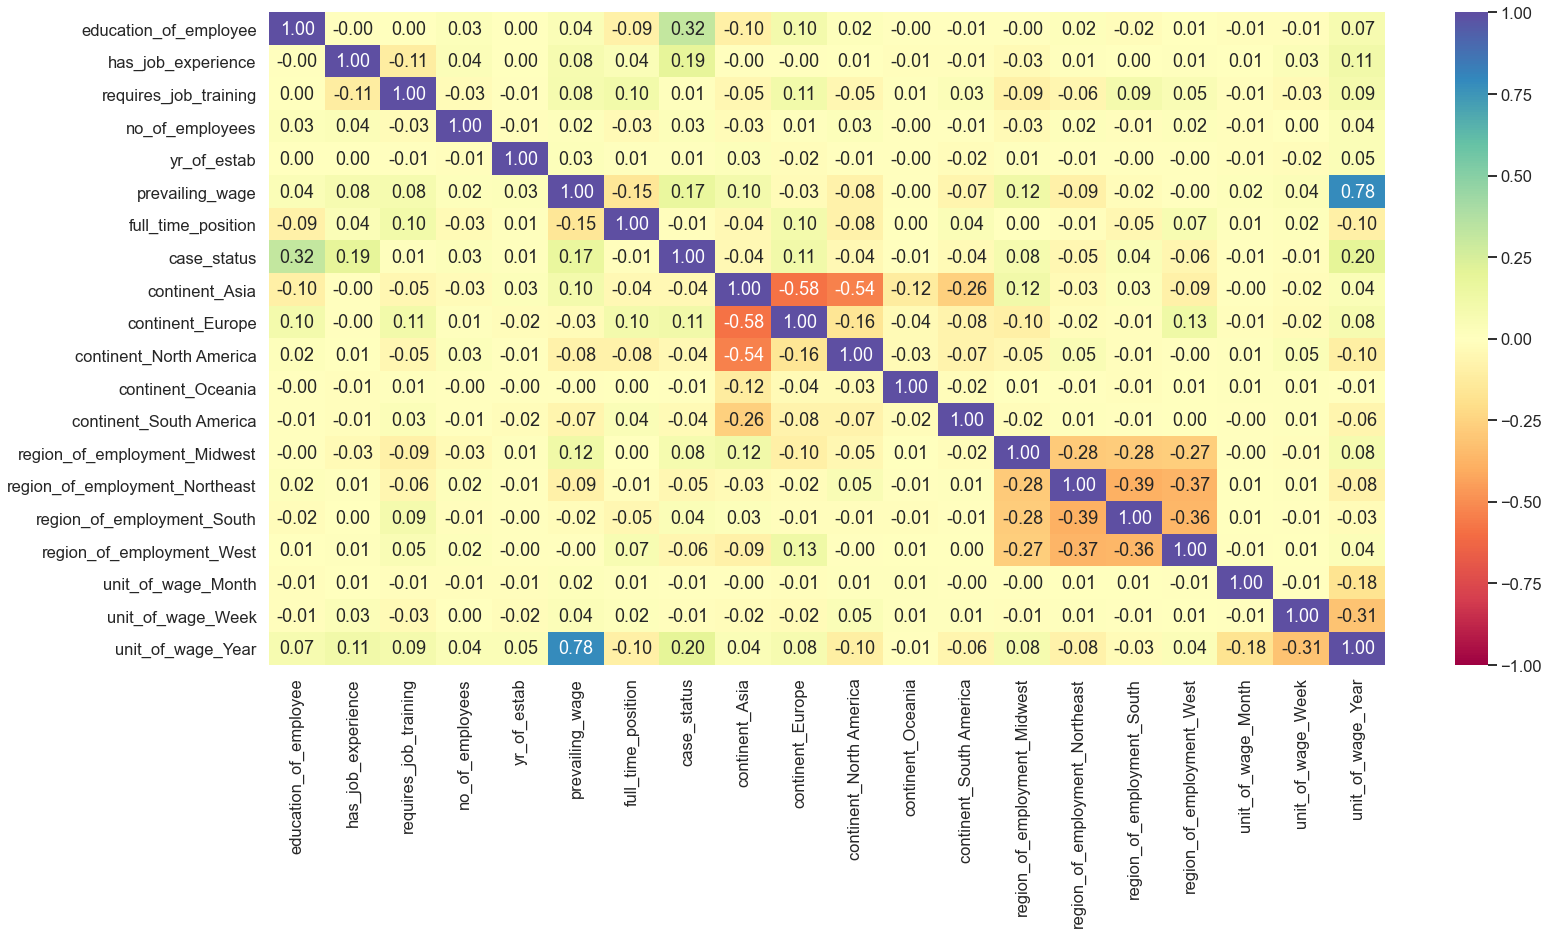

<IPython.core.display.Javascript object>

In [38]:
# Plot new correlation heatmap (AFTER applying log transformations)

plt.figure(figsize=(25, 12))
sns.heatmap(nl.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")

# Observations of Second EDA

- The log-transformed data looks good now and will be used in the modeling below
- There seems to be a slight increase in certification approval for larger companies overall, but there is too much variance and no_of_employees will likely have little importance
- With prevailing_wage being log-transformed, we can see there is a higher likelihood of VISA approvals the higher the prevailing wage
- No correlation for yr_of_estab and no_of_eployees
- The two heatmaps show the slight differences in corrlations when prevailing_wage and no_of_employees are log-transformed
- There's a very strong correlation (.78) between unit of wage Year and prevailing wage. This means jobs marked as salary have a higher prevailing wage than Month, Week, or Hour

### Top correlations for case_status:
- education of employee (.32)
- has job experience (.19)
- prevailing wage (.17)
- continent Europe (.11)
- unit of wage Year (.20)

### Bottom correlations for case_status:
- region West
- region Northeast

If we kept all the dummy variables instead of dropping the first column, we could see more correlations here.



# Split the data and write performance function

In [39]:
# Split data on the log-transformed dataset

X = nl.drop(["case_status"], axis=1)
y = nl["case_status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

# Check to make sure the split was stratified correctly
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (19110, 19)
Shape of test set :  (6370, 19)
Percentage of classes in training set:
1    0.66787
0    0.33213
Name: case_status, dtype: float64
Percentage of classes in test set:
1    0.667975
0    0.332025
Name: case_status, dtype: float64


<IPython.core.display.Javascript object>

In [40]:
# Let's make 2 more datasets with different feature engineering to train different models

dm = df.copy()

# Change all Y/N to 1/0
for i in ["has_job_experience", "requires_job_training", "full_time_position"]:
    dm[i] = dm[i].map({"Y": 1, "N": 0})

# Change case status to 1 for certified and 0 for denied
dm["case_status"] = dm["case_status"].map({"Certified": 1, "Denied": 0})

# One-hot encode the remaining object columns and drop the first column of each
dm = pd.get_dummies(
    dm,
    columns=[
        "continent",
        "region_of_employment",
        "unit_of_wage",
        "education_of_employee",
    ],
    drop_first=True,
)

# Compared to nl, dm has more dummies (eduation wasn't changed to ordinal numbers this time) and no natural log

# dmnl is the same as dm with natural log transformations
dmnl = dm.copy()
dmnl["no_of_employees"] = np.log(dmnl["no_of_employees"])
dmnl["prevailing_wage"] = np.log(dmnl["prevailing_wage"])


# Now split the data for more model testing

X1 = dm.drop(["case_status"], axis=1)
y1 = dm["case_status"]

X2 = dmnl.drop(["case_status"], axis=1)
y2 = dmnl["case_status"]

X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1, y1, random_state=1, stratify=y
)
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, random_state=1, stratify=y
)

<IPython.core.display.Javascript object>

In [41]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

# Building bagging and boosting models

# Decision Tree Classifier

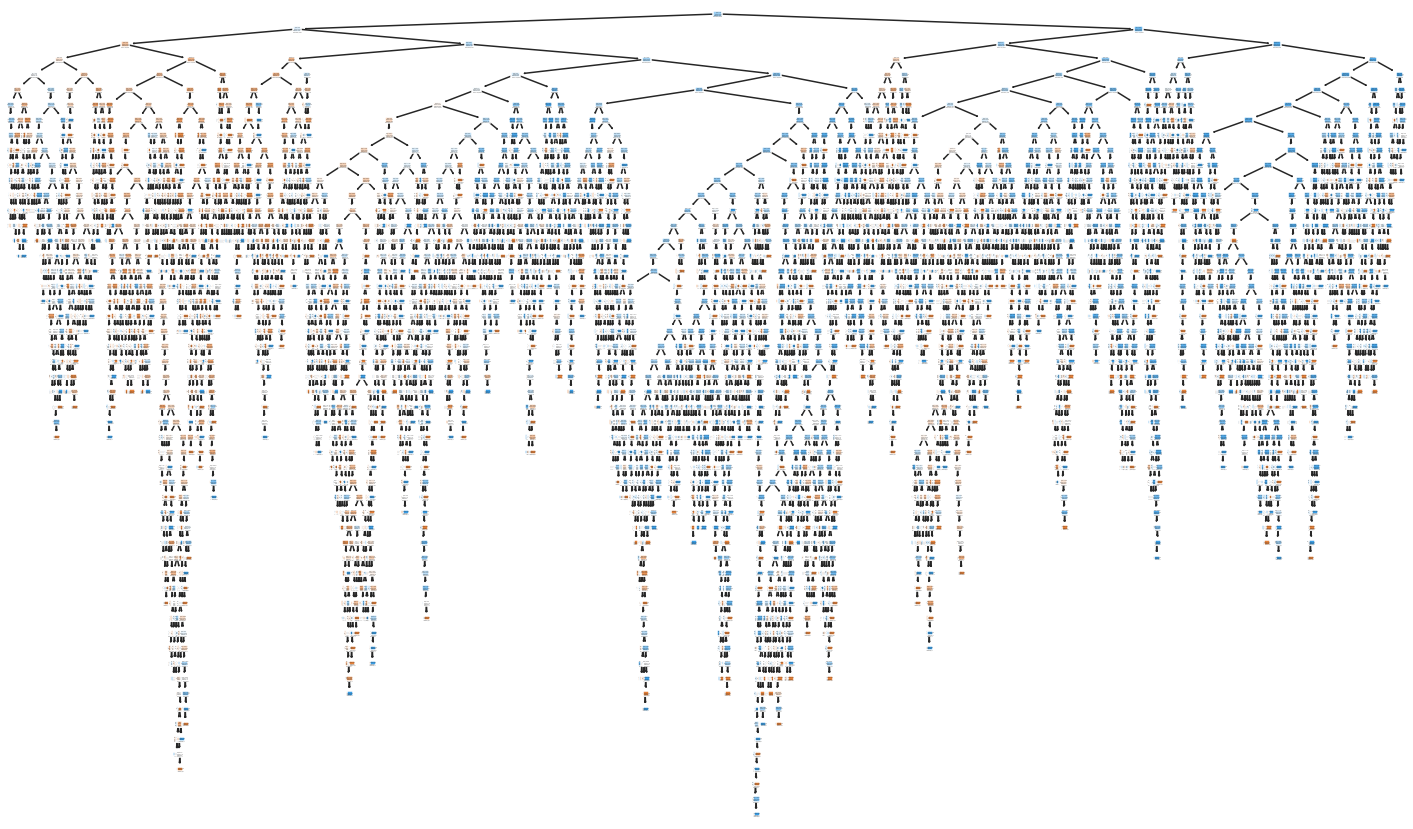

<IPython.core.display.Javascript object>

In [42]:
# First we build a Decision Tree model with 'entropy' as the criterion

# We are using the first training set

tree0 = DecisionTreeClassifier(criterion="entropy", random_state=1)
tree = tree0.fit(X_train, y_train)

plt.figure(figsize=(25, 15))
plot_tree(tree, filled=True)
plt.show()

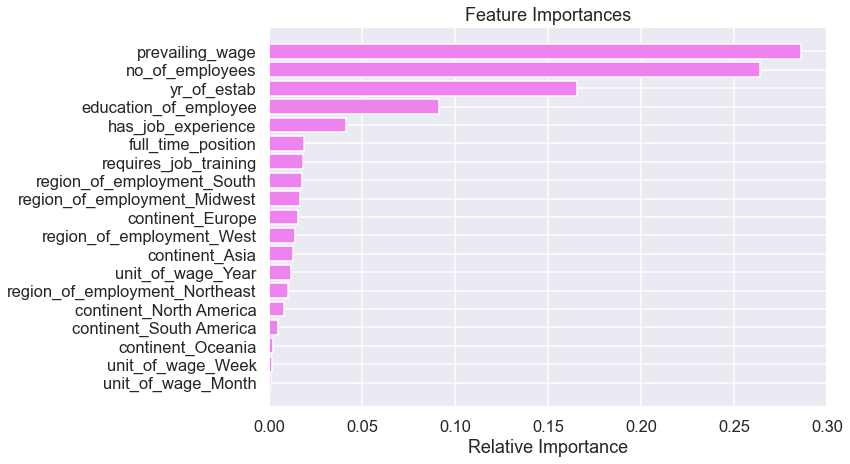

<IPython.core.display.Javascript object>

In [43]:
# Plot the important features

importances = tree0.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(10, 7))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [44]:
# Decision Tree Performance

tree0_perf_train = model_performance_classification_sklearn(tree0, X_train, y_train)
tree0_perf_test = model_performance_classification_sklearn(tree0, X_test, y_test)

print("Tree Naught training scores:\n", tree0_perf_train)
print("\nTree Naught testing scores:\n", tree0_perf_test)

Tree Naught training scores:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

Tree Naught testing scores:
    Accuracy    Recall  Precision        F1
0  0.655573  0.745946   0.740378  0.743151


<IPython.core.display.Javascript object>

### Observation on first Decision Tree model

This first Decision Tree model using defaults is definitely overfitting the training set. An accuracy of 65% is not very good. We can do better than an F1 Score of 74%.

### Top 5 Features:
- prevailing wage
- no of employees
- yr of establishment
- education of employee
- has job experience

The top 4 features have numerical ranges whereas the rest of the features are binary (0 or 1). Is this surprising? Not really. Dummy variables alone have little weight, but can be more deterministic when combined with other dummy variables. It makes sense that features with larger ranges could be divided more times in decision trees and so interact with other variables more often. 

A higher prevailing wage might increase likelihood of certification overall, but a lower prevailing wage being approved might be just as likely if all the other boxes are checked off.

### Bottom 5 Features:

- unit of wage Month
- unit of wage Week
- continent Oceania
- continent South America
- continent North America

It's quite possible that continent is a biased variable. It might be true that more certifications are given to one continent over another, but perhaps we don't want to predict Visas in the future based on continent. 

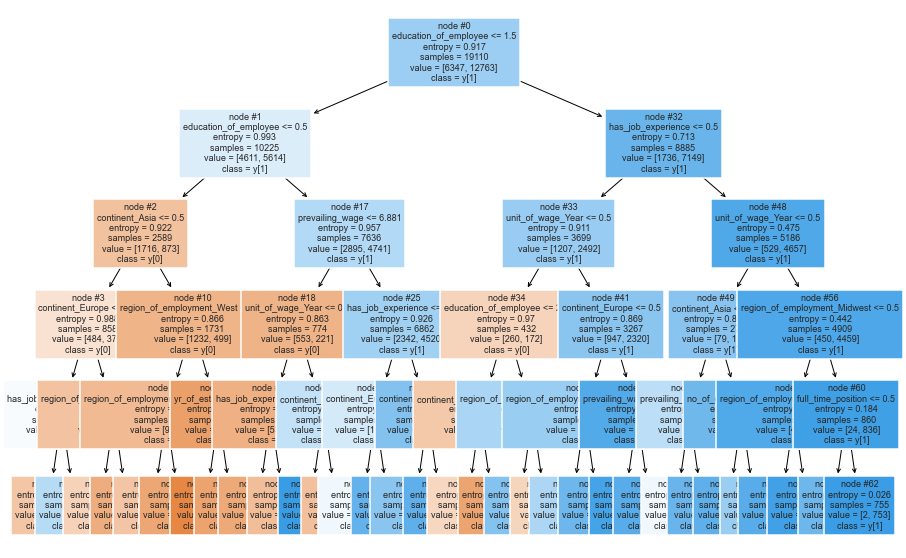

<IPython.core.display.Javascript object>

In [66]:
# Let's do a pre-pruned model with max_depth of 4 so we can see the first few splits

tree0 = DecisionTreeClassifier(criterion="entropy", random_state=1, max_depth=5)
tree0.fit(X_train, y_train)

plt.figure(figsize=(15, 10))

out = plot_tree(
    tree0,
    feature_names=list(X.columns),
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

### Let's make 2 more Decision Trees using the 2 other datasets that are slightly engineered differently.

In [46]:
# Now let's check the performance of the 2nd training set (education split into dummy variables, no natural log)

tree01 = DecisionTreeClassifier(criterion="entropy", random_state=1)
tree01.fit(X1_train, y1_train)
tree01_perf_train = model_performance_classification_sklearn(tree01, X1_train, y1_train)
tree01_perf_test = model_performance_classification_sklearn(tree01, X1_test, y1_test)

print("Tree Naught training scores:\n", tree01_perf_train)
print("\nTree Naught testing scores:\n", tree01_perf_test)

Tree Naught training scores:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

Tree Naught testing scores:
    Accuracy   Recall  Precision        F1
0  0.651177  0.73819   0.739233  0.738711


<IPython.core.display.Javascript object>

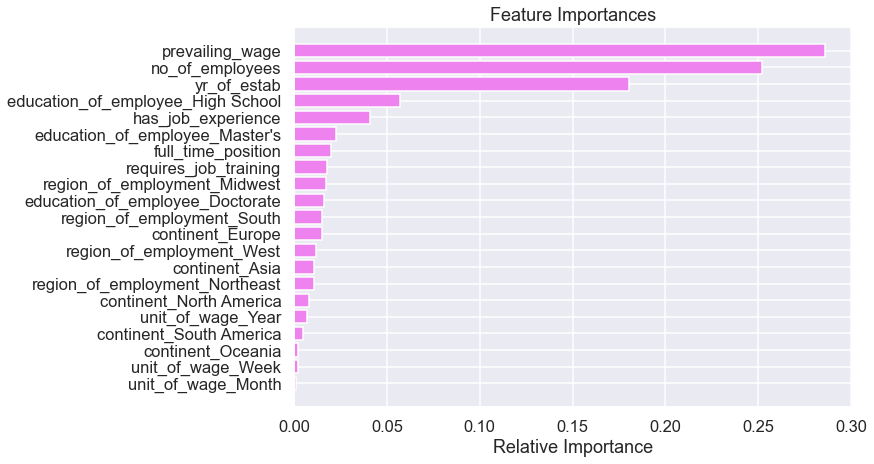

<IPython.core.display.Javascript object>

In [47]:
# Important features of 2nd training set 

importances = tree01.feature_importances_
indices = np.argsort(importances)
feature_names = list(X1.columns)

plt.figure(figsize=(10, 7))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [48]:
# Build model with 3rd training set (education split into dummy variables, yes natural log)

tree02 = DecisionTreeClassifier(criterion="entropy", random_state=1)
tree02.fit(X2_train, y2_train)
tree02_perf_train = model_performance_classification_sklearn(tree02, X2_train, y2_train)
tree02_perf_test = model_performance_classification_sklearn(tree02, X2_test, y2_test)

print("Tree Naught training scores:\n", tree02_perf_train)
print("\nTree Naught testing scores:\n", tree02_perf_test)

Tree Naught training scores:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

Tree Naught testing scores:
    Accuracy   Recall  Precision       F1
0  0.649137  0.73772   0.737201  0.73746


<IPython.core.display.Javascript object>

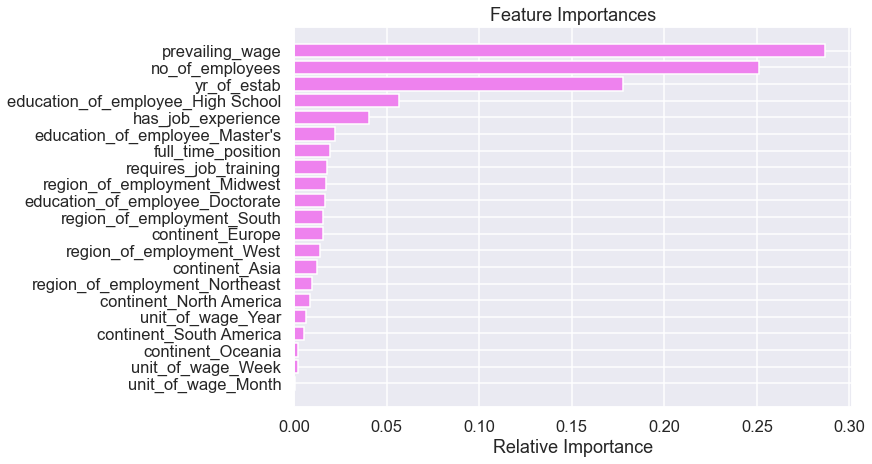

<IPython.core.display.Javascript object>

In [49]:
# Important features of 3rd training set

importances = tree02.feature_importances_
indices = np.argsort(importances)
feature_names = list(X2.columns)

plt.figure(figsize=(10, 7))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# Initial Decision Tree Observations using all 3 training sets:
- All 3 Decision Trees were overfitting.
- For all 3 models, the top 3 important features remained the same, which happened to be the original 3 numerical columns.
- The first training set had better scores than the other two, probably because education was numerical.
- Next we will look for a model that reduces overfitting and feature bias.

# Decision Tree Classifier with GridSearchCV

In [50]:
# Create a new tree and use GridSearch to tune hyperparameters
tree1 = DecisionTreeClassifier(class_weight="balanced", random_state=1)

# Grid of parameters to choose from
parameters = {
    "criterion": ["entropy", "gini"],
    "max_depth": np.arange(2, 30),
    "min_samples_leaf": [1, 2, 3, 5, 7, 10],
    "max_leaf_nodes": [2, 3, 5, 10],
    "min_impurity_decrease": [0.0001, 0.001, 0.01, 0.1],
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(tree1, parameters, scoring=scorer, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
tree1 = grid_obj.best_estimator_

# Fit the best algorithm to the data.
tree1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=2, max_leaf_nodes=2, min_impurity_decrease=0.1,
                       random_state=1)

<IPython.core.display.Javascript object>

In [51]:
# Calculating different metrics
tree1_perf_train = model_performance_classification_sklearn(tree1, X_train, y_train)
tree1_perf_test = model_performance_classification_sklearn(tree1, X_test, y_test)

print("Tree1 training scores:\n", tree1_perf_train)
print("\nTree1 testing scores:\n", tree1_perf_test)

Tree1 training scores:
    Accuracy  Recall  Precision        F1
0   0.66787     1.0    0.66787  0.800866

Tree1 testing scores:
    Accuracy  Recall  Precision        F1
0  0.667975     1.0   0.667975  0.800941


<IPython.core.display.Javascript object>

In [77]:
tree1.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])

<IPython.core.display.Javascript object>

### Observation of GridSearchCV on Decision Tree

The model was tuned to find the best F1 Score, which it did, but unfortuneatly, this tree is way too simple with a max depth of 2. The training and testing scores are the same, and there are no important features to analyze. This model is not stable.

# Bagging Classifier

In [52]:
# Next we build a Bagging Classifier (using default Decision Tree) (and just the first training set)

bag0 = BaggingClassifier(random_state=1)
bag0.fit(X_train, y_train)

bag0_perf_train = model_performance_classification_sklearn(bag0, X_train, y_train)
bag0_perf_test = model_performance_classification_sklearn(bag0, X_test, y_test)

print("Bagging Classifier training scores:\n", bag0_perf_train)
print("\nBagging Classifier testing scores:\n", bag0_perf_test)

Bagging Classifier training scores:
    Accuracy    Recall  Precision       F1
0  0.985453  0.985505    0.99266  0.98907

Bagging Classifier testing scores:
    Accuracy    Recall  Precision        F1
0  0.699529  0.781669   0.771515  0.776558


<IPython.core.display.Javascript object>

# Bagging Classifier with GridSearchCV

In [53]:
# Next we build a Bagging Classifier and tune it a little bit

bag1 = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_samples": [0.7, 0.8, 0.9],
    "max_features": [0.7, 0.8, 0.9],
    "n_estimators": np.arange(10, 100, 10),
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(bag1, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bag1 = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bag1.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.7, n_estimators=80,
                  random_state=1)

<IPython.core.display.Javascript object>

In [54]:
bag1_perf_train = model_performance_classification_sklearn(bag1, X_train, y_train)
bag1_perf_test = model_performance_classification_sklearn(bag1, X_test, y_test)

print("Tuned Bagging Classifier training scores:\n", bag1_perf_train)
print("\nTuned Bagging Classifier testing scores:\n", bag1_perf_test)

Tuned Bagging Classifier training scores:
    Accuracy   Recall  Precision        F1
0  0.987912  0.99906   0.983115  0.991023

Tuned Bagging Classifier testing scores:
    Accuracy    Recall  Precision        F1
0  0.729984  0.890717   0.751239  0.815054


<IPython.core.display.Javascript object>

### Observation of Bagging
Both Bagging models were overfitting, but the F1 scores on the test sets are improving.

# Random Forest Classifier

In [55]:
# Next, we build a Random Forest with default parameters

for0 = RandomForestClassifier(random_state=1)
for0.fit(X_train, y_train)

for0_perf_train = model_performance_classification_sklearn(for0, X_train, y_train)
for0_perf_test = model_performance_classification_sklearn(for0, X_test, y_test)

print("Random Forest Classifier training scores:\n", for0_perf_train)
print("\nRandom Forest Classifier testing scores:\n", for0_perf_test)

Random Forest Classifier training scores:
    Accuracy  Recall  Precision        F1
0  0.999948     1.0   0.999922  0.999961

Random Forest Classifier testing scores:
    Accuracy    Recall  Precision        F1
0  0.720094  0.841363   0.763652  0.800626


<IPython.core.display.Javascript object>

### Observation of Default Random Forest

Model is overfitting.

# Random Forest Classifier with GridSearchCV

In [56]:
# GridSearch on Random Forest using first training set

for1 = RandomForestClassifier(
    random_state=1, class_weight="balanced", oob_score=True, bootstrap=True
)

parameters = {
    "max_depth": list(np.arange(5, 15, 5)),
    "min_samples_leaf": np.arange(1, 15, 5),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [3, 5, 7],
    "n_estimators": np.arange(50, 100, 10),
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(for1, parameters, scoring=acc_scorer, cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
for1 = grid_obj.best_estimator_

# Fit the best algorithm to the data.
for1.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       max_features='sqrt', min_samples_split=3,
                       n_estimators=80, oob_score=True, random_state=1)

<IPython.core.display.Javascript object>

In [57]:
for1_perf_train = model_performance_classification_sklearn(for1, X_train, y_train)
for1_perf_test = model_performance_classification_sklearn(for1, X_test, y_test)

print("Tuned Random Forest Classifier training scores:\n", for1_perf_train)
print("\nTuned Random Classifier testing scores:\n", for1_perf_test)

Tuned Random Forest Classifier training scores:
    Accuracy    Recall  Precision        F1
0  0.770748  0.800752    0.84757  0.823496

Tuned Random Classifier testing scores:
    Accuracy    Recall  Precision        F1
0   0.72292  0.773443   0.804252  0.788547


<IPython.core.display.Javascript object>

### Finally, the Random Forest model using GridSearchCV has reduced overfitting.

### Let's see if it has also reduced feature bias.

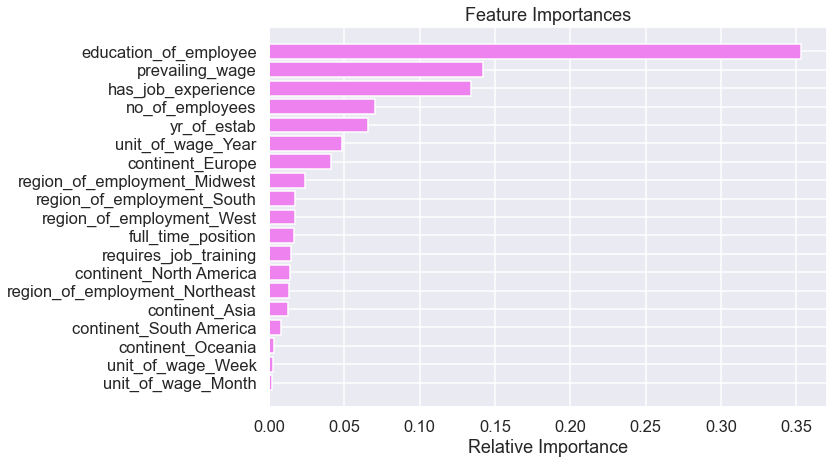

<IPython.core.display.Javascript object>

In [76]:
# Important features of 1st training set

importances = for1.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(10, 7))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Observation

We see that the original numerical columns such as `no_of_employees` and `yr_of_estab` have moved down and lost importance, while `education_of_employee` has moved to the top!

This means our Random Forest is making better aggregated predictions on random variables; the importance of features is spreading out.

#### Let's build Random Forests using GridSearch on the 2nd and 3rd training sets now to see how the feature importances change.

In [70]:
# GridSearch on Random Forest on 2nd training set

for2 = RandomForestClassifier(
    random_state=1, class_weight="balanced", oob_score=True, bootstrap=True
)

parameters = {
    "max_depth": list(np.arange(5, 15, 5)),
    "min_samples_leaf": np.arange(1, 15, 5),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [3, 5, 7],
    "n_estimators": np.arange(50, 100, 10),
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(for2, parameters, scoring=acc_scorer, cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X1_train, y1_train)

# Set the clf to the best combination of parameters
for2 = grid_obj.best_estimator_

# Fit the best algorithm to the data.
for2.fit(X1_train, y1_train)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       max_features='sqrt', min_samples_split=3,
                       n_estimators=90, oob_score=True, random_state=1)

<IPython.core.display.Javascript object>

In [72]:
for2_perf_train = model_performance_classification_sklearn(for2, X1_train, y1_train)
for2_perf_test = model_performance_classification_sklearn(for2, X1_test, y1_test)

print("Tuned Random Forest Classifier training scores:\n", for2_perf_train)
print("\nTuned Random Classifier testing scores:\n", for2_perf_test)

Tuned Random Forest Classifier training scores:
    Accuracy    Recall  Precision        F1
0  0.764731  0.801692   0.838895  0.819872

Tuned Random Classifier testing scores:
    Accuracy    Recall  Precision        F1
0  0.724019  0.782609   0.799904  0.791162


<IPython.core.display.Javascript object>

In [73]:
# GridSearch on Random Forest on 3rd training set

for3 = RandomForestClassifier(
    random_state=1, class_weight="balanced", oob_score=True, bootstrap=True
)

parameters = {
    "max_depth": list(np.arange(5, 15, 5)),
    "min_samples_leaf": np.arange(1, 15, 5),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [3, 5, 7],
    "n_estimators": np.arange(50, 100, 10),
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(for3, parameters, scoring=acc_scorer, cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X2_train, y2_train)

# Set the clf to the best combination of parameters
for3 = grid_obj.best_estimator_

# Fit the best algorithm to the data.
for3.fit(X2_train, y2_train)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       max_features='sqrt', min_samples_split=3,
                       n_estimators=90, oob_score=True, random_state=1)

<IPython.core.display.Javascript object>

In [74]:
for3_perf_train = model_performance_classification_sklearn(for3, X2_train, y2_train)
for3_perf_test = model_performance_classification_sklearn(for3, X2_test, y2_test)

print("Tuned Random Forest Classifier training scores:\n", for3_perf_train)
print("\nTuned Random Classifier testing scores:\n", for3_perf_test)

Tuned Random Forest Classifier training scores:
    Accuracy    Recall  Precision        F1
0  0.764574  0.801771   0.838633  0.819788

Tuned Random Classifier testing scores:
    Accuracy    Recall  Precision        F1
0  0.723548  0.782139   0.799616  0.790781


<IPython.core.display.Javascript object>

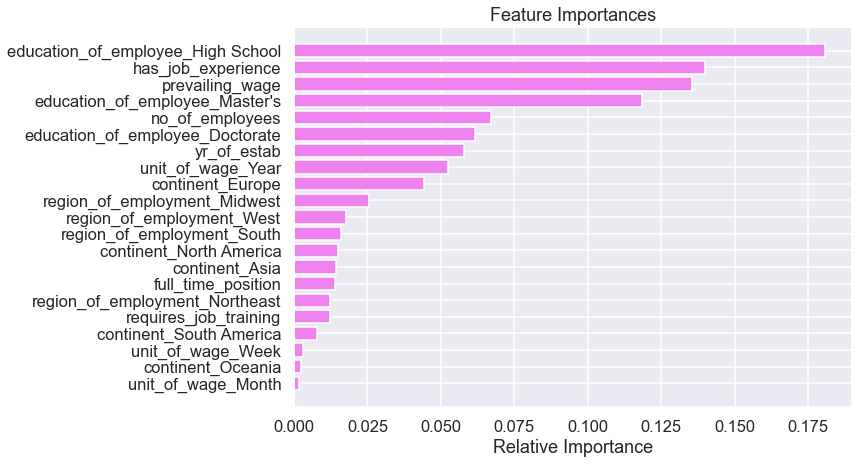

<IPython.core.display.Javascript object>

In [75]:
# Important features of 3rd training set

importances = for3.feature_importances_
indices = np.argsort(importances)
feature_names = list(X2.columns)

plt.figure(figsize=(10, 7))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Observation of Tuned Random Forest models on the 3 slightly altered datasets

- The 3 training sets had nearly the same GridSearch results and test scores.
- All 3 solved the problem of overfitting. The training and testing scores are much closer to each other and more stable.
- They all used 'sqrt' as the max_features for sampling features.
- Because of the nature of Random Forests, the feature selection was random at each split so it reduced feature bias.


- We see that the features with large number ranges are not as important as they were in the original decision tree.
- The most important feature now is education.
- It's interesting how the 2nd and 3rd training sets had better test scores this time, probably because education was created into dummy variables.
- We also see that by changing education to dummy variables in the 2nd and 3rd sets, the distribution of importance among features has tended to spread out.


#### Can we find a more stable model with an F1 Score higher than 79%?

# AdaBoost Classifier

In [58]:
# Adaptive Boosting with default parameters

abc0 = AdaBoostClassifier(random_state=1)
abc0.fit(X_train, y_train)

abc0_perf_train = model_performance_classification_sklearn(abc0, X_train, y_train)
abc0_perf_test = model_performance_classification_sklearn(abc0, X_test, y_test)

print("AdaBoost Classifier training scores:\n", abc0_perf_train)
print("\nAdaBoost Classifier testing scores:\n", abc0_perf_test)

AdaBoost Classifier training scores:
    Accuracy    Recall  Precision       F1
0  0.738305  0.889681   0.759633  0.81953

AdaBoost Classifier testing scores:
    Accuracy    Recall  Precision       F1
0  0.727316  0.884371   0.751398  0.81248


<IPython.core.display.Javascript object>

# AdaBoost Classifier with GridSearchCV

In [59]:
# GridSearch on AdaBoost

abc1 = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1),
        DecisionTreeClassifier(max_depth=2),
        DecisionTreeClassifier(max_depth=3),
    ],
    "n_estimators": np.arange(10, 110, 20),
    "learning_rate": np.arange(0.1, 0.5, 0.1),
}

# Type of scoring used to compare parameter  combinations
scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc1, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc1 = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc1.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.2, n_estimators=30, random_state=1)

<IPython.core.display.Javascript object>

In [60]:
abc1_perf_train = model_performance_classification_sklearn(abc1, X_train, y_train)
abc1_perf_test = model_performance_classification_sklearn(abc1, X_test, y_test)

print("Tuned AdaBoost Classifier training scores:\n", abc1_perf_train)
print("\nTuned AdaBoost Classifier testing scores:\n", abc1_perf_test)

Tuned AdaBoost Classifier training scores:
    Accuracy    Recall  Precision        F1
0  0.753532  0.877537   0.780651  0.826263

Tuned AdaBoost Classifier testing scores:
    Accuracy   Recall  Precision        F1
0  0.737834  0.87309    0.76677  0.816484


<IPython.core.display.Javascript object>

### Obersvation of AdaBoost (Default and Tuned)

- These AdaBoost models have the best F1 Scores so far at around 81%
- The scores appear stable

# Gradient Boosting Classifier

In [61]:
# Gradient Boosting with default parameters on first training set

# Fitting the model
gbc0 = GradientBoostingClassifier(random_state=1)
gbc0.fit(X_train, y_train)

gbc0_perf_train = model_performance_classification_sklearn(gbc0, X_train, y_train)
gbc0_perf_test = model_performance_classification_sklearn(gbc0, X_test, y_test)

print("Gradient Boosting Classifier training scores:\n", gbc0_perf_train)
print("\nGradient Boosting Classifier testing scores:\n", gbc0_perf_test)

Gradient Boosting Classifier training scores:
    Accuracy    Recall  Precision        F1
0  0.757405  0.878398    0.78426  0.828664

Gradient Boosting Classifier testing scores:
    Accuracy    Recall  Precision        F1
0   0.74113  0.874266   0.769549  0.818572


<IPython.core.display.Javascript object>

In [62]:
# Gradient Boosting on 2nd training set (no ordinal education, no natural log)

# Fitting the model
gbc01 = GradientBoostingClassifier(random_state=1)
gbc01.fit(X1_train, y1_train)

gbc01_perf_train = model_performance_classification_sklearn(gbc01, X1_train, y1_train)
gbc01_perf_test = model_performance_classification_sklearn(gbc01, X1_test, y1_test)

print("Gradient Boosting Classifier training scores:\n", gbc01_perf_train)
print("\nGradient Boosting Classifier testing scores:\n", gbc01_perf_test)

Gradient Boosting Classifier training scores:
    Accuracy    Recall  Precision        F1
0  0.759236  0.881454   0.784628  0.830228

Gradient Boosting Classifier testing scores:
    Accuracy    Recall  Precision        F1
0  0.740502  0.873325   0.769358  0.818052


<IPython.core.display.Javascript object>

In [63]:
# Gradient Boosting on 3rd engineered set (no ordinal education, yes natural log)

# Fitting the model
gbc02 = GradientBoostingClassifier(random_state=1)
gbc02.fit(X2_train, y2_train)

gbc02_perf_train = model_performance_classification_sklearn(gbc02, X2_train, y2_train)
gbc02_perf_test = model_performance_classification_sklearn(gbc02, X2_test, y2_test)

print("Gradient Boosting Classifier training scores:\n", gbc02_perf_train)
print("\nGradient Boosting Classifier testing scores:\n", gbc02_perf_test)

Gradient Boosting Classifier training scores:
    Accuracy    Recall  Precision        F1
0  0.759236  0.881454   0.784628  0.830228

Gradient Boosting Classifier testing scores:
    Accuracy    Recall  Precision        F1
0  0.740502  0.873325   0.769358  0.818052


<IPython.core.display.Javascript object>

### Observation on Gradient Boosting on 3 different training sets

- Just like in the initial Decision Tree, the first training set that uses ordinal numbers for education is slightly outperforming the other 2 training sets. 
- Also, the natural log transformation doesn't seem to change the model performance either. 


- We will only use the first training set for the rest of this notebook.

#### Can we do better than 81.8% F1 Score?

# Gradient Boosting Classifier with GridSearchCV

In [64]:
# GridSearch on Gradient Boosting

gbc1 = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100, 200, 250],
    "subsample": [0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9, 1],
    "learning_rate": np.arange(0.1, 0.4, 0.1),
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc1, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc1 = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc1.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, random_state=1, subsample=1)

<IPython.core.display.Javascript object>

In [65]:
gbc1_perf_train = model_performance_classification_sklearn(gbc1, X_train, y_train)
gbc1_perf_test = model_performance_classification_sklearn(gbc1, X_test, y_test)

print("Tuned Gradient Boosting Classifier training scores:\n", gbc1_perf_train)
print("\nTuned Gradient Boosting Classifier testing scores:\n", gbc1_perf_test)

Tuned Gradient Boosting Classifier training scores:
    Accuracy    Recall  Precision        F1
0  0.758137  0.879574   0.784432  0.829283

Tuned Gradient Boosting Classifier testing scores:
    Accuracy    Recall  Precision        F1
0    0.7427  0.877321   0.769691  0.819989


<IPython.core.display.Javascript object>

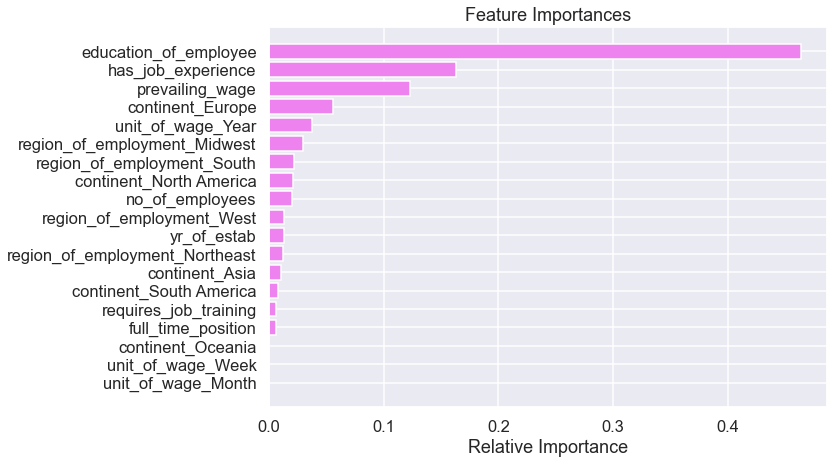

<IPython.core.display.Javascript object>

In [69]:
# Important features in Gradient Boosting model with GridSearchCV

importances = gbc1.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(10, 7))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Observation of Tuned Gradient Boost Model

- This model has the best F1 testing score so far with 82%

#### Top 5 Important Features
- education of employee
- has job experience
- prevailing wage
- continent Europe
- unit of wage Year

# XGBoost Classifier

In [79]:
# Extreme Gradient Boosting using default parameters

xgb0 = XGBClassifier(random_state=1, use_label_encoder=False, eval_metric="logloss")
xgb0.fit(X_train, y_train)

xgb0_perf_train = model_performance_classification_sklearn(xgb0, X_train, y_train)
xgb0_perf_test = model_performance_classification_sklearn(xgb0, X_test, y_test)

print("XGBoost Classifier training scores:\n", xgb0_perf_train)
print("\nXGBoost Classifier testing scores:\n", xgb0_perf_test)

XGBoost Classifier training scores:
    Accuracy    Recall  Precision       F1
0  0.834485  0.929405   0.839847  0.88236

XGBoost Classifier testing scores:
    Accuracy    Recall  Precision        F1
0  0.729356  0.860165   0.764251  0.809376


<IPython.core.display.Javascript object>

# XGBoost Classifier with GridSearchCV

In [82]:
xgb1 = XGBClassifier(random_state=1, eval_metric="logloss", use_label_encoder=False)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [50, 100],
    "scale_pos_weight": [1, 2],
    "subsample": [0.8, 1],
    "learning_rate": [0.2, 0.3],
    "gamma": [2, 4],
    "colsample_bytree": [0.7, 0.9],
    "colsample_bylevel": [0.8, 1],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb1, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb1 = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb1.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9,
              enable_categorical=False, eval_metric='logloss', gamma=2,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

In [83]:
# XGBoost Performance

xgb1_perf_train = model_performance_classification_sklearn(xgb1, X_train, y_train)
xgb1_perf_test = model_performance_classification_sklearn(xgb1, X_test, y_test)

print("Tuned XGBoost Classifier training scores:\n", xgb1_perf_train)
print("\nTuned XGBoost Classifier testing scores:\n", xgb1_perf_test)

Tuned XGBoost Classifier training scores:
    Accuracy    Recall  Precision        F1
0  0.784563  0.894147   0.804909  0.847185

Tuned XGBoost Classifier testing scores:
    Accuracy    Recall  Precision       F1
0  0.740345  0.870505   0.770543  0.81748


<IPython.core.display.Javascript object>

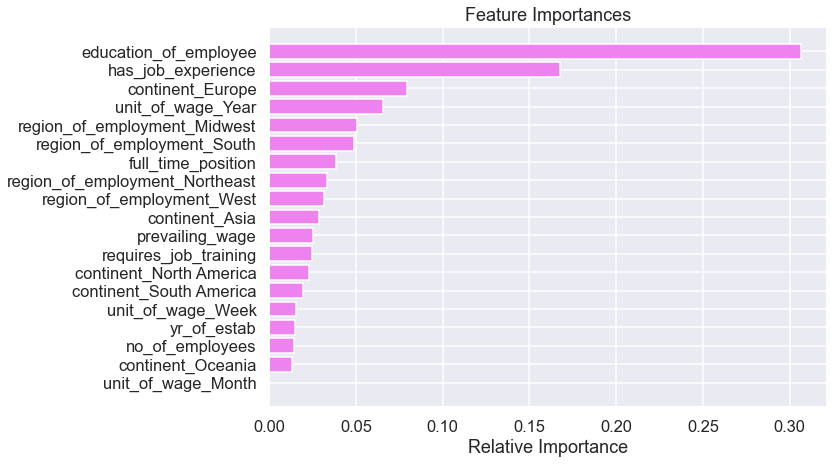

<IPython.core.display.Javascript object>

In [84]:
# Important features in XGBoost with GridSearchCV

importances = xgb1.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(10, 7))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Observation of XGBoost

- These models scored really well, but they did not beat the F1 score of the Tuned Gradient Boost model.
- The most important features have changed quite a lot: `yr_of_estab` and `no_of_employees` have dropped to the bottom.
- Education still remains the most important feature

# Stacking Classifier

In [103]:
estimators = [
    ("AdaBoost Tuned", abc1),
    ("Gradient Boosting Tuned", gbc1),
    ("Bagging Tuned", bag1),
]

final_estimator = xgb1

sc0 = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
sc0.fit(X_train, y_train)

sc0_perf_train = model_performance_classification_sklearn(sc0, X_train, y_train)
sc0_perf_test = model_performance_classification_sklearn(sc0, X_test, y_test)

print("Stacking Classifier training scores:\n", sc0_perf_train)
print("\nStacking Classifier testing scores:\n", sc0_perf_test)

Stacking Classifier training scores:
    Accuracy    Recall  Precision        F1
0  0.767085  0.880906   0.793213  0.834763

Stacking Classifier testing scores:
    Accuracy   Recall  Precision        F1
0  0.740973  0.87121   0.770846  0.817961


<IPython.core.display.Javascript object>

### Observation of Stacking

- The stacking model seems stable with nearly 82% for the F1 Score
- Not as good as the Gradient Boost models

## Model Performance Comparison and Conclusions

In [104]:
# testing performance comparison

model_test_perf = pd.concat(
    [
        tree0_perf_test,
        tree1_perf_test,
        bag0_perf_test,
        bag1_perf_test,
        for0_perf_test,
        for1_perf_test,
        abc0_perf_test,
        abc1_perf_test,
        gbc0_perf_test,
        gbc1_perf_test,
        xgb0_perf_test,
        xgb1_perf_test,
        sc0_perf_test,
    ]
)

model_test_perf.index = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Bagging",
    "Bagging Tuned",
    "Random Forest",
    "Random Forest Tuned",
    "AdaBoost",
    "AdaBoost Tuned",
    "Gradient Boost",
    "Gradient Boost Tuned",
    "XGBoost",
    "XGBoost Tuned",
    "Stacking",
]

print("Testing Performance of all models:")
model_test_perf

Testing Performance of all models:


Accuracy    Recall  Precision        F1
Decision Tree         0.655573  0.745946   0.740378  0.743151
Decision Tree Tuned   0.667975  1.000000   0.667975  0.800941
Bagging               0.699529  0.781669   0.771515  0.776558
Bagging Tuned         0.729984  0.890717   0.751239  0.815054
Random Forest         0.720094  0.841363   0.763652  0.800626
Random Forest Tuned   0.722920  0.773443   0.804252  0.788547
AdaBoost              0.727316  0.884371   0.751398  0.812480
AdaBoost Tuned        0.737834  0.873090   0.766770  0.816484
Gradient Boost        0.741130  0.874266   0.769549  0.818572
Gradient Boost Tuned  0.742700  0.877321   0.769691  0.819989
XGBoost               0.729356  0.860165   0.764251  0.809376
XGBoost Tuned         0.740345  0.870505   0.770543  0.817480
Stacking              0.740973  0.871210   0.770846  0.817961

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Testing Peformance of All Classification Models')

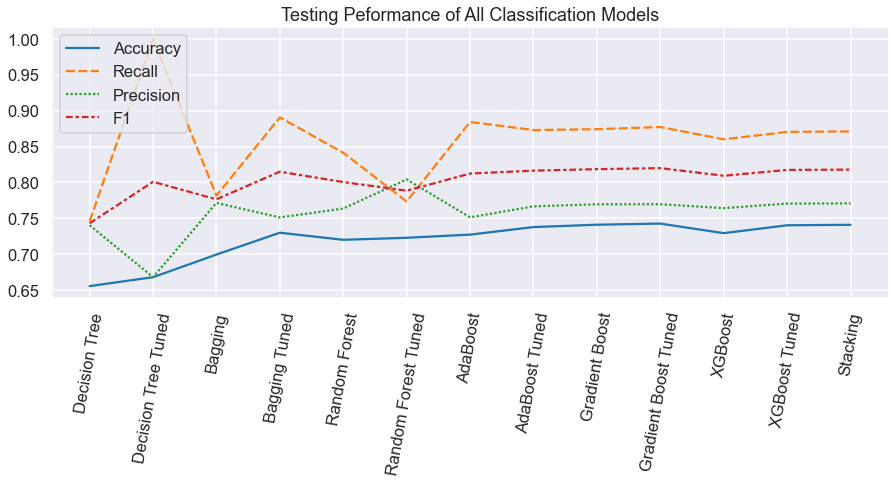

<IPython.core.display.Javascript object>

In [107]:
model_test_perf["Model Type"] = model_test_perf.index
plt.figure(figsize=(15, 5))
sns.lineplot(data=model_test_perf)
plt.xticks(rotation=80)
plt.title("Testing Peformance of All Classification Models")

# Observations

This final graph shows the performance of all the models in the order they were built in this notebook.


- We can see that all the boosting models on the right side have steady scores for all four metrics.
- The bagging models on the left side have lower accuracy, lower F1 scores, and the recall and precision scores vary more wildly.
- ### The Tuned Gradient Boost model had the best performance out of all the models with an F1 score of 82% and an Accuracy score of 74%.


## How to facilitate the process of visa approvals...

From this analysis we have learned that certain applications are more likely to be approved. 

An application for a certified case looks like this:
- Higher education level (Doctorate or Master's)
- Has job experience
- Paid yearly salary
- Going to the Midwest region


In [126]:
# How many rows match the ideal approved profile

dmnl.loc[
    (dmnl["education_of_employee_Doctorate"] == 1)
    | (dmnl["education_of_employee_Master's"] == 1)
    & (dmnl["has_job_experience"] == 1)
    & (dmnl["unit_of_wage_Year"] == 1)
    & (dmnl["region_of_employment_Midwest"] == 1)
].shape[0]

3247

<IPython.core.display.Javascript object>

In [125]:
# How many of those ideal profiles were actually approved?

dmnl.loc[
    (dmnl["education_of_employee_Doctorate"] == 1)
    | (dmnl["education_of_employee_Master's"] == 1)
    & (dmnl["has_job_experience"] == 1)
    & (dmnl["unit_of_wage_Year"] == 1)
    & (dmnl["region_of_employment_Midwest"] == 1)
    & (dmnl["case_status"] == 1)
].shape[0]

3215

<IPython.core.display.Javascript object>

In [135]:
# Percent of dataset that matches profile
print(3247 / 25480 * 100)

# Percent of profiles that were actually approved
print(3215 / 3247 * 100)

12.743328100470958
99.01447489990761


<IPython.core.display.Javascript object>

In [131]:
# What is 12% of 800,000 ?
800000 * 0.12

96000.0

<IPython.core.display.Javascript object>

### 12.7% of the dataset meets the ideal profile of certified applications and 99% of those observations were actually approved.


### If the department receives 800,000 applications next year, our model and our "ideal profile" will help us process 96,000 applications for approval at once. 

#### Then the model can be used to organize the applications into bins for faster processing.

## Actionable Insights and Recommendations

- These models can be improved if we can collect data on the length of the VISA (temporary or permanent) as well as the industry (tech, health, food service, etc)
- Since `has_job_experience` is such an important factor, we think the model can be improved if it is changed to `yrs_of_job_experience` for more nuanced analyses.
- The Tuned Gradient Boost model will help facilitate certifications with 74% accuracy.
- The Tuned Gradient Boost model also has the highest F1 score, meaning it was the best at reducing both Type I and Type II errors.
- This model can be used to shortlist applications for faster approvals. If the models predicts approval and the application looks like the ideal profile above, it's safe to automatically approve them.